# **Problem** **1**

In [1]:
from sklearn.datasets import fetch_openml
from matplotlib import pyplot
import numpy as np

In [2]:
data = fetch_openml(data_id=40926) # get CIFAR-10 data from OpenML
print(data)

{'data': array([[ 59.,  43.,  50., ..., 140.,  84.,  72.],
       [154., 126., 105., ..., 139., 142., 144.],
       [255., 253., 253., ...,  83.,  83.,  84.],
       ...,
       [ 20.,  19.,  15., ...,  50.,  53.,  47.],
       [ 25.,  15.,  23., ...,  80.,  81.,  80.],
       [ 73.,  98.,  99., ...,  94.,  58.,  26.]]), 'target': array(['6', '9', '9', ..., '5', '1', '7'], dtype=object), 'feature_names': ['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20', 'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30', 'a31', 'a32', 'a33', 'a34', 'a35', 'a36', 'a37', 'a38', 'a39', 'a40', 'a41', 'a42', 'a43', 'a44', 'a45', 'a46', 'a47', 'a48', 'a49', 'a50', 'a51', 'a52', 'a53', 'a54', 'a55', 'a56', 'a57', 'a58', 'a59', 'a60', 'a61', 'a62', 'a63', 'a64', 'a65', 'a66', 'a67', 'a68', 'a69', 'a70', 'a71', 'a72', 'a73', 'a74', 'a75', 'a76', 'a77', 'a78', 'a79', 'a80', 'a81', 'a82', 'a83', 'a84', 'a85',

In [3]:
def display_img(arr):
    R = arr[0:1024].reshape(32,32)/255.0
    G = arr[1024:2048].reshape(32,32)/255.0
    B = arr[2048:].reshape(32,32)/255.0
    
    img = np.dstack((R,G,B))
    fig = pyplot.figure(figsize=(3,3))
    ax = fig.add_subplot(111)
    ax.imshow(img,interpolation='bicubic')

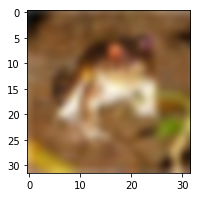

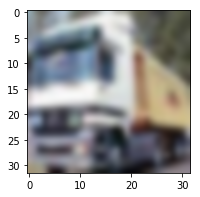

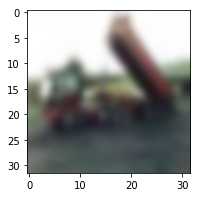

In [4]:
for i in range(0,3): 
    display_img(data['data'][i])

In [5]:
# Splitting the data up

from sklearn.model_selection import train_test_split

X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [6]:
# Optimizing on a subset of training data for speed
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

X_train = X_train[:2000]
y_train = y_train[:2000]

In [7]:
# Let's train our logistic regression model now

from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

C_values = [1.5, 1.0, .75, .25, .1, .01, .001]


l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization

# Set regularization parameter
for C in C_values:
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, multi_class='multinomial', penalty='l1', tol=0.01, solver='saga')
    clf_l2_LR = LogisticRegression(C=C, multi_class='multinomial', penalty='l2', tol=0.01, solver='saga')
    clf_en_LR = LogisticRegression(C=C, multi_class='multinomial', penalty='elasticnet', solver='saga',
                                   l1_ratio=l1_ratio, tol=0.01)
    clf_l1_LR.fit(X_train, y_train)
    clf_l2_LR.fit(X_train, y_train)
    clf_en_LR.fit(X_train, y_train)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print("C=%.2f" % C)
    print("{:<40} {:.2f}%".format("Sparsity with L1 penalty:", sparsity_l1_LR))
    print("{:<40} {:.2f}%".format("Sparsity with Elastic-Net penalty:",sparsity_en_LR))
    print("{:<40} {:.2f}%".format("Sparsity with L2 penalty:", sparsity_l2_LR))

    print("{:<40} {:.2f}".format("Training Score with L1 penalty:", clf_l1_LR.score(X_train, y_train)))
    print("{:<40} {:.2f}".format("Training Score with Elastic-Net penalty:", clf_en_LR.score(X_train, y_train)))
    print("{:<40} {:.2f}".format("Training Score with L2 penalty:", clf_l2_LR.score(X_train, y_train)))

    print("{:<40} {:.2f}".format("Testing Score with L1 penalty:", clf_l1_LR.score(X_test, y_test)))
    print("{:<40} {:.2f}".format("Testing Score with Elastic-Net penalty:", clf_en_LR.score(X_test, y_test)))
    print("{:<40} {:.2f}".format("Testing Score with L2 penalty:", clf_l2_LR.score(X_test, y_test)))


C=1.50
Sparsity with L1 penalty:                3.16%
Sparsity with Elastic-Net penalty:       0.42%
Sparsity with L2 penalty:                0.00%
Training Score with L1 penalty:          0.81
Training Score with Elastic-Net penalty: 0.82
Training Score with L2 penalty:          0.84
Testing Score with L1 penalty:           0.32
Testing Score with Elastic-Net penalty:  0.32
Testing Score with L2 penalty:           0.31
C=1.00
Sparsity with L1 penalty:                12.02%
Sparsity with Elastic-Net penalty:       2.67%
Sparsity with L2 penalty:                0.00%
Training Score with L1 penalty:          0.79
Training Score with Elastic-Net penalty: 0.82
Training Score with L2 penalty:          0.84
Testing Score with L1 penalty:           0.32
Testing Score with Elastic-Net penalty:  0.32
Testing Score with L2 penalty:           0.31
C=0.75
Sparsity with L1 penalty:                24.73%
Sparsity with Elastic-Net penalty:       7.47%
Sparsity with L2 penalty:                0.00%
Tr

By examining the above results, it seems that our models tend to break down somewhere between C=0.10 and C=0.01. The percentage of sparsity therefore starts affecting our model somewhere between 90-99% for L1, and 76-98% for elasticnet. Let's use these results to refine our parameters and find the optimal model.

In [8]:
C_values = [.15, .14, .13, .12, .11, .1]

# Set regularization parameter
for C in C_values:
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, multi_class='multinomial', penalty='l1', tol=0.01, solver='saga')
    clf_l2_LR = LogisticRegression(C=C, multi_class='multinomial', penalty='l2', tol=0.01, solver='saga')
    clf_en_LR = LogisticRegression(C=C, multi_class='multinomial', penalty='elasticnet', solver='saga',
                                   l1_ratio=l1_ratio, tol=0.01)
    clf_l1_LR.fit(X_train, y_train)
    clf_l2_LR.fit(X_train, y_train)
    clf_en_LR.fit(X_train, y_train)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print("C=%.2f" % C)
    print("{:<40} {:.2f}%".format("Sparsity with L1 penalty:", sparsity_l1_LR))
    print("{:<40} {:.2f}%".format("Sparsity with Elastic-Net penalty:",sparsity_en_LR))
    print("{:<40} {:.2f}%".format("Sparsity with L2 penalty:", sparsity_l2_LR))

    print("{:<40} {:.2f}".format("Training Score with L1 penalty:", clf_l1_LR.score(X_train, y_train)))
    print("{:<40} {:.2f}".format("Training Score with Elastic-Net penalty:", clf_en_LR.score(X_train, y_train)))
    print("{:<40} {:.2f}".format("Training Score with L2 penalty:", clf_l2_LR.score(X_train, y_train)))

    print("{:<40} {:.2f}".format("Testing Score with L1 penalty:", clf_l1_LR.score(X_test, y_test)))
    print("{:<40} {:.2f}".format("Testing Score with Elastic-Net penalty:", clf_en_LR.score(X_test, y_test)))
    print("{:<40} {:.2f}".format("Testing Score with L2 penalty:", clf_l2_LR.score(X_test, y_test)))

C=0.15
Sparsity with L1 penalty:                81.95%
Sparsity with Elastic-Net penalty:       62.65%
Sparsity with L2 penalty:                0.00%
Training Score with L1 penalty:          0.58
Training Score with Elastic-Net penalty: 0.69
Training Score with L2 penalty:          0.83
Testing Score with L1 penalty:           0.35
Testing Score with Elastic-Net penalty:  0.34
Testing Score with L2 penalty:           0.32
C=0.14
Sparsity with L1 penalty:                82.36%
Sparsity with Elastic-Net penalty:       64.33%
Sparsity with L2 penalty:                0.00%
Training Score with L1 penalty:          0.57
Training Score with Elastic-Net penalty: 0.68
Training Score with L2 penalty:          0.83
Testing Score with L1 penalty:           0.35
Testing Score with Elastic-Net penalty:  0.34
Testing Score with L2 penalty:           0.32
C=0.13
Sparsity with L1 penalty:                85.24%
Sparsity with Elastic-Net penalty:       61.95%
Sparsity with L2 penalty:                0.00

We are getting pretty similar numbers for a lot of these models so we'll just pick the most consistent and general one to be our model (C=0.10) shown above.

# **Problem** **2**

In [9]:
data = fetch_openml(data_id=554) # get CIFAR-10 data from OpenML
print(data)

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', '

In [10]:
X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [11]:
# Optimizing on a subset of training data
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

X_train = X_train[:2000]
y_train = y_train[:2000]
print(X_train.shape)

(2000, 784)


In [14]:


l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization

# Set regularization parameter
for C in [1.4, 1.2, 1.1, 0.1, 0.01]:
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, multi_class='multinomial', penalty='l1', tol=0.01, solver='saga')
    clf_l2_LR = LogisticRegression(C=C, multi_class='multinomial', penalty='l2', tol=0.01, solver='saga')
    clf_en_LR = LogisticRegression(C=C, multi_class='multinomial',penalty='elasticnet', solver='saga',
                                   l1_ratio=l1_ratio, tol=0.01)
    clf_l1_LR.fit(X_train, y_train)
    clf_l2_LR.fit(X_train, y_train)
    clf_en_LR.fit(X_train, y_train)

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm
    
    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print("C=%.2f" % C)
    print("{:<40} {:.2f}%".format("Sparsity with L1 penalty:", sparsity_l1_LR))
    print("{:<40} {:.2f}%".format("Sparsity with Elastic-Net penalty:", sparsity_en_LR))
    print("{:<40} {:.2f}%".format("Sparsity with L2 penalty:", sparsity_l2_LR))

    print("{:<40} {:.2f}".format("Training Score with L1 penalty:",clf_l1_LR.score(X_train, y_train)))
    print("{:<40} {:.2f}".format("Training Score with Elastic-Net penalty:",clf_en_LR.score(X_train, y_train)))
    print("{:<40} {:.2f}".format("Training Score with L2 penalty:",clf_l2_LR.score(X_train, y_train)))

    print("{:<40} {:.2f}".format("Testing Score with L1 penalty:",clf_l1_LR.score(X_test, y_test)))
    print("{:<40} {:.2f}".format("Testing Score with Elastic-Net penalty:",clf_en_LR.score(X_test, y_test)))
    print("{:<40} {:.2f}".format("Testing Score with L2 penalty:",clf_l2_LR.score(X_test, y_test)))


C=1.40
Sparsity with L1 penalty:                23.61%
Sparsity with Elastic-Net penalty:       20.10%
Sparsity with L2 penalty:                8.67%
Training Score with L1 penalty:          0.90
Training Score with Elastic-Net penalty: 0.90
Training Score with L2 penalty:          0.90
Testing Score with L1 penalty:           0.86
Testing Score with Elastic-Net penalty:  0.86
Testing Score with L2 penalty:           0.86
C=1.20
Sparsity with L1 penalty:                24.31%
Sparsity with Elastic-Net penalty:       20.70%
Sparsity with L2 penalty:                8.67%
Training Score with L1 penalty:          0.90
Training Score with Elastic-Net penalty: 0.90
Training Score with L2 penalty:          0.90
Testing Score with L1 penalty:           0.86
Testing Score with Elastic-Net penalty:  0.86
Testing Score with L2 penalty:           0.86
C=1.10
Sparsity with L1 penalty:                24.97%
Sparsity with Elastic-Net penalty:       21.68%
Sparsity with L2 penalty:                8.67

When we set C=1 wee get the best and most general function. 

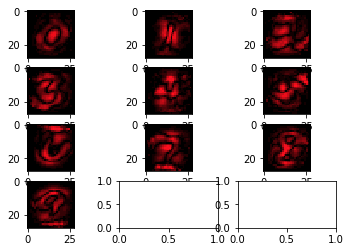

In [13]:
opt_clf = LogisticRegression(C=.01, multi_class='multinomial', penalty='l2', tol=0.01, solver='saga')
opt_clf.fit(X_train, y_train)

fig, axes = pyplot.subplots(4, 3)

for i, (axes_row) in enumerate(axes):
      
     
      if (i == 3):
        coefs = opt_clf.coef_[9]

        axes_row[0].imshow(np.abs(coefs.reshape(28,28)), interpolation='nearest',
                           cmap='gist_stern', vmax=1, vmin=0)
      else:
        coefs = opt_clf.coef_[3*i:3*i+3]


        for ax, coef in zip(axes_row, coefs):
          ax.imshow(np.abs(coef.reshape(28, 28)), interpolation='nearest',
                    cmap='gist_stern', vmax=1, vmin=0)



# **Problem** **3**

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

%matplotlib inline

In [2]:
mnist_raw = fetch_openml(data_id=554) # get CIFAR-10 data from OpenML
print(mnist_raw)

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60

In [3]:
print(mnist_raw.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])


Data and target are clearly seperated which will make the proccess easier

In [4]:
X_data = mnist_raw['data']
Y_target = mnist_raw['target']

X_data acts as our X with pixel intensities from 0 to 255 which are of 28 x 28 (784) images. Y_target acts as our y containing all labels from 0 - 9 mapping to X_data.

Y_target contains the integer values as strings as seen above. Let's convert it to integers

In [5]:
Y_target = Y_target.astype(np.uint8)
Y_target[2]

4

5
0
4


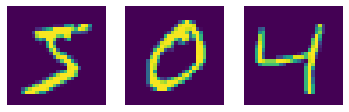

In [6]:
for i in range(0, 3):
    digit = X_data[i] # represents first pixel number
    digit_pixels = digit.reshape(28, 28) # reshape to 28 x 28 matrix
    plt.subplot(131 + i) # subplot smaller than default
    plt.imshow(digit_pixels) # takes array image
    plt.axis('off')
    print(Y_target[i])

Split up Train and Test

In [7]:
X_train, X_test, y_train, y_test = X_data[:60000], X_data[60000:], Y_target[:60000], Y_target[60000:]
print('Train Data: ', X_train, '\n', 'Test Data:', X_test, '\n',
     'Train label: ', y_train, '\n', 'Test Label: ', y_test)

Train Data:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 Test Data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 Train label:  [5 0 4 ... 5 6 8] 
 Test Label:  [7 2 1 ... 4 5 6]


### Part 1

In [31]:
# Baseline Random Forest
rfc_model = RandomForestClassifier(n_estimators=100,
                                    criterion='gini',
                                    max_depth=None,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_features='auto', max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None, bootstrap=True,
                                    oob_score=False, n_jobs=None,
                                    random_state=42, verbose=0,
                                    warm_start=False,
                                    class_weight=None,
                                    ccp_alpha=0.0, max_samples=None
                                   )

In [32]:
# Fit Baseline rfc
rfc_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [10]:
# Check 3-fold Cross-Validation to see accuracy
# Have to make sure that scoring is set to accuracy so we can compare to Logistic
cross_val_score(rfc_model, X_train, y_train, cv=3, scoring='accuracy')



array([0.9646 , 0.96255, 0.9666 ])

3-Fold cross validation gets between 96-97% accuracy.

In [61]:
# Check 5-fold Cross-Validation to see accuracy
cross_val_score(rfc_model, X_train, y_train, cv=5, scoring='accuracy')

array([0.96858333, 0.96558333, 0.96366667, 0.96233333, 0.97016667])

5-Fold cross validation also gets between 96-97% accuracy

In [63]:
rfc_score = rfc_model.score(X_test, y_test)
rfc_score

0.9694

The actual score of this model is 0.9694. 

Now we will use Cross Validation to get a rough estimate of good hyperparameters. Below are the current hyperparameters and we need to optimize them to get the highest possible accuracy.

In [11]:
pprint(rfc_model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


For this section, we will use RandomizedSearchCV to randomly try different sets of hyperparameters at random to narrow down where the best ones are. This differs from usual Grid Search as that is more fine-tuned and does not try random hyperparameters. The included hyperparameters are the ones we found most impactful to the model's score.

In [29]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Whether bootstrap samples are used when building trees
# If False, the whole datset is used to build each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [30]:
# 5 Fold CV, Use all cores, 150 Combinations
rf = RandomForestClassifier();
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 40,
                               cv = 3,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1)

In [74]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 150.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [82]:
#Return best parameters from RandomSearchCV
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [25]:
#made this one to prevent re-running RSCV
rfc_new = RandomForestClassifier(n_estimators= 1800,
                                 min_samples_split= 2,
                                 min_samples_leaf= 1,
                                 max_features= 'auto',
                                 max_depth= 50,
                                 bootstrap= False)

In [26]:
rfc_new.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

The above hyperparameters are the best from the RandomizedSearchCV.

In [35]:
print("Base Score:")
print(base_score)

Base Score:
0.9705


In [34]:
print("Tuned Score:")
print(random_score)

Tuned Score:
0.9751


In [33]:
#Compare accuracy of tuned model vs base
random_score = rfc_new.score(X_test, y_test)
base_score = rfc_model.score(X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_score - base_score) / base_score))

Improvement of 0.47%.


In [ ]:
#Compare best model vs. logistic regression

### Part 2
Now we will try Gradient Boosting to do the same thing: Get a base model, tune hyperparameters, compare tuned vs. base, compare best vs. RFC, compare best vs. logistic

In [16]:
from xgboost.sklearn import XGBClassifier
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)
gb_model = XGBClassifier(
    nthread=-1, #set to -1 to use all threads available
    n_jobs=-1, #set to -1 to use all threads, could be same as nthread
    seed=79, # random number seed
    random_state=0, #leave at 0 for reproducible results. Can try others (0)
    #set for GPU Hardware acceleration
    gpu_id=0,
    tree_method='gpu_hist'
    )
random_grid_gb = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

In [17]:
gb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=79, subsample=1,
              tree_method='gpu_hist', validate_parameters=False,
              verbosity=None)

In [18]:
gb_base_score = gb_model.score(X_test, y_test)
gb_base_score

0.9795

In [21]:
cross_val_score(gb_model, X_train, y_train, cv=3, scoring='accuracy')

array([0.97555, 0.9716 , 0.97285])

The cross validation score (3 fold) ranges from 97 - 98 % accurate and the actual model scores 0.9795 on the test data.

In [9]:
gb_random = RandomizedSearchCV(estimator = XGBClassifier(),
                               param_distributions = random_grid_gb,
                               n_iter = 20,
                               cv = 2,
                               verbose=2,
                               random_state=42,
                               n_jobs = 1)

In [10]:
#find best one by fitting each random set of hp
gb_random.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] colsample_bytree=0.9252155845351104, gamma=1.5601864044243652, learning_rate=0.11239780813448107, max_depth=13, min_child_weight=30.73980825409684, n_estimators=38, reg_alpha=7.708098373328053, subsample=0.9937572296628479 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.9252155845351104, gamma=1.5601864044243652, learning_rate=0.11239780813448107, max_depth=13, min_child_weight=30.73980825409684, n_estimators=38, reg_alpha=7.708098373328053, subsample=0.9937572296628479, total= 6.8min
[CV] colsample_bytree=0.9252155845351104, gamma=1.5601864044243652, learning_rate=0.11239780813448107, max_depth=13, min_child_weight=30.73980825409684, n_estimators=38, reg_alpha=7.708098373328053, subsample=0.9937572296628479 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.8min remaining:    0.0s


[CV]  colsample_bytree=0.9252155845351104, gamma=1.5601864044243652, learning_rate=0.11239780813448107, max_depth=13, min_child_weight=30.73980825409684, n_estimators=38, reg_alpha=7.708098373328053, subsample=0.9937572296628479, total= 2.0min
[CV] colsample_bytree=0.681939791143364, gamma=6.1748150962771655, learning_rate=0.29466126419531236, max_depth=27, min_child_weight=17.211149627697075, n_estimators=30, reg_alpha=182.01497768138802, subsample=0.9906270827741552 
[CV]  colsample_bytree=0.681939791143364, gamma=6.1748150962771655, learning_rate=0.29466126419531236, max_depth=27, min_child_weight=17.211149627697075, n_estimators=30, reg_alpha=182.01497768138802, subsample=0.9906270827741552, total= 1.2min
[CV] colsample_bytree=0.681939791143364, gamma=6.1748150962771655, learning_rate=0.29466126419531236, max_depth=27, min_child_weight=17.211149627697075, n_estimators=30, reg_alpha=182.01497768138802, subsample=0.9906270827741552 
[CV]  colsample_bytree=0.681939791143364, gamma=6.1

[CV]  colsample_bytree=0.8168821862783325, gamma=6.334037565104235, learning_rate=0.3985842360750871, max_depth=30, min_child_weight=12.323195802577699, n_estimators=22, reg_alpha=111.54067026177805, subsample=0.8325253553053832, total= 1.1min
[CV] colsample_bytree=0.9712419150915043, gamma=4.271077886262563, learning_rate=0.37720590636899726, max_depth=5, min_child_weight=0.34882045908253234, n_estimators=10, reg_alpha=38.18807751704673, subsample=0.9099479985045033 
[CV]  colsample_bytree=0.9712419150915043, gamma=4.271077886262563, learning_rate=0.37720590636899726, max_depth=5, min_child_weight=0.34882045908253234, n_estimators=10, reg_alpha=38.18807751704673, subsample=0.9099479985045033, total=  24.7s
[CV] colsample_bytree=0.9712419150915043, gamma=4.271077886262563, learning_rate=0.37720590636899726, max_depth=5, min_child_weight=0.34882045908253234, n_estimators=10, reg_alpha=38.18807751704673, subsample=0.9099479985045033 
[CV]  colsample_bytree=0.9712419150915043, gamma=4.271

[CV]  colsample_bytree=0.9196270427281408, gamma=5.683086033354716, learning_rate=0.08746990713123699, max_depth=24, min_child_weight=15.408007392941558, n_estimators=32, reg_alpha=180.61547030814629, subsample=0.8642391331808185, total= 1.8min
[CV] colsample_bytree=0.9418638777900282, gamma=4.925176938188639, learning_rate=0.1280971951192178, max_depth=21, min_child_weight=42.43209473424399, n_estimators=19, reg_alpha=260.61166994910684, subsample=0.9721308467038826 
[CV]  colsample_bytree=0.9418638777900282, gamma=4.925176938188639, learning_rate=0.1280971951192178, max_depth=21, min_child_weight=42.43209473424399, n_estimators=19, reg_alpha=260.61166994910684, subsample=0.9721308467038826, total=  52.7s
[CV] colsample_bytree=0.9418638777900282, gamma=4.925176938188639, learning_rate=0.1280971951192178, max_depth=21, min_child_weight=42.43209473424399, n_estimators=19, reg_alpha=260.61166994910684, subsample=0.9721308467038826 
[CV]  colsample_bytree=0.9418638777900282, gamma=4.92517

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 39.3min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F281841948>,
                                        'reg_alp

In [11]:
#Return best parameters from RandomSearchCV
gb_random.best_params_

{'colsample_bytree': 0.9692206821226456,
 'gamma': 0.3142918568673425,
 'learning_rate': 0.30456416450551216,
 'max_depth': 34,
 'min_child_weight': 59.456851110666285,
 'n_estimators': 39,
 'reg_alpha': 14.336941149164916,
 'subsample': 0.898377733005299}

In [12]:
gb_new = XGBClassifier(colsample_bytree= 0.9692206821226456,
         gamma = 0.3142918568673425,
         learning_rate= 0.30456416450551216,
         max_depth= 34,
         min_child_weight=59.456851110666285,
         n_estimators=39,
         reg_alpha=14.336941149164916,
         subsample= 0.898377733005299)

In [13]:
gb_new.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9692206821226456,
              gamma=0.3142918568673425, gpu_id=-1, importance_type='gain',
              interaction_constraints=None, learning_rate=0.30456416450551216,
              max_delta_step=0, max_depth=34,
              min_child_weight=59.456851110666285, missing=nan,
              monotone_constraints=None, n_estimators=39, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=14.336941149164916, reg_lambda=1, scale_pos_weight=None,
              subsample=0.898377733005299, tree_method=None,
              validate_parameters=False, verbosity=None)

In [22]:
gb_random_score = gb_new.score(X_test, y_test)
gb_random_score

0.9596

In [37]:
#Compare accuracy of tuned XGB model vs base XGB
gb_random_score = gb_new.score(X_test, y_test)
print('Decrease of {:0.2f}%.'.format( 100 * (gb_random_score - gb_base_score) / gb_base_score))

Decrease of -2.03%.


In [21]:
#Compre accuracy of best XBG vs. tuned RFC
print('Increase of {:0.2f}%.'.format( 100 * (gb_base_score - random_score) / random_score))

Increase of 7.24%.


Based on the results, the tuned Gradient Boosting model performed worse than the baseline Gradient Boosting and the Random Forest (tuned). This is probably because RanddomSearchCV is not all-inclusive and could likely find combinations that are not accurate. Also, some hyperparameters like reg_alpha go outside of the recommended values for an XGB model. The baseline XGB model performs better tan the tuned RFC as well.

In [39]:
#Compare best model vs. logistic regression

# **Problem** **4**

In [37]:
from sklearn.datasets import fetch_openml
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
import numpy as np

In [2]:
data = fetch_openml(data_id=40926) # CIFAR-10 data from OpenML
print(data)

{'data': array([[ 59.,  43.,  50., ..., 140.,  84.,  72.],
       [154., 126., 105., ..., 139., 142., 144.],
       [255., 253., 253., ...,  83.,  83.,  84.],
       ...,
       [ 20.,  19.,  15., ...,  50.,  53.,  47.],
       [ 25.,  15.,  23., ...,  80.,  81.,  80.],
       [ 73.,  98.,  99., ...,  94.,  58.,  26.]]), 'target': array(['6', '9', '9', ..., '5', '1', '7'], dtype=object), 'frame': None, 'feature_names': ['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20', 'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30', 'a31', 'a32', 'a33', 'a34', 'a35', 'a36', 'a37', 'a38', 'a39', 'a40', 'a41', 'a42', 'a43', 'a44', 'a45', 'a46', 'a47', 'a48', 'a49', 'a50', 'a51', 'a52', 'a53', 'a54', 'a55', 'a56', 'a57', 'a58', 'a59', 'a60', 'a61', 'a62', 'a63', 'a64', 'a65', 'a66', 'a67', 'a68', 'a69', 'a70', 'a71', 'a72', 'a73', 'a74', 'a75', 'a76', 'a77', 'a78', 'a79', 'a80', 'a81', 'a82', 'a83'

In [3]:
X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

### Part 1

In [4]:
rfc_modelCF = RandomForestClassifier(n_estimators=100,
                                    criterion='gini',
                                    max_depth=None,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_features='auto', max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None, bootstrap=True,
                                    oob_score=False, n_jobs=None,
                                    random_state=42, verbose=0,
                                    warm_start=False,
                                    class_weight=None,
                                    ccp_alpha=0.0, max_samples=None
                                   )

In [5]:
rfc_modelCF.fit(X_train, y_train)
rfc_modelCF_preds = rfc_modelCF.predict(X_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, rfc_modelCF_preds )))

Accuracy Score: 0.4362


In [6]:
cross_val_score(rfc_modelCF, X_train, y_train, cv=5, scoring='accuracy')

array([0.42833333, 0.42433333, 0.43633333, 0.41433333, 0.417     ])

In [9]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_gridCF = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_gridCF)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [11]:
rf_randomCF = RandomizedSearchCV(estimator = RandomForestClassifier(),
                               param_distributions = random_gridCF,
                               n_iter = 20,
                               cv = 2,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1)

In [12]:
rf_randomCF.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 38.1min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [13]:
#Return best parameters from RandomSearchCV
rf_randomCF.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [6]:
rfc_modelCFNew = RandomForestClassifier(n_estimators= 2000,
     min_samples_split=2,
     min_samples_leaf= 2,
     max_features='auto',
     max_depth= 50,
     bootstrap= False)

In [7]:
rfc_modelCFNew.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
#Compare accuracy of tuned model vs base
random_score = rfc_modelCFNew.score(X_test, y_test)
base_score = rfc_modelCF.score(X_test, y_test)
print('Tuned Improvement of {:0.2f}%.'.format( 100 * (random_score - base_score) / base_score))

Tuned Improvement of 7.61%.


In [21]:
print("Base Score:")
print(base_score)

Base Score:
0.419


In [20]:
print("Tuned Score:")
print(random_score)

Tuned Score:
0.467


In [23]:
#Compare with logistic

### Part 2

In [9]:
from xgboost.sklearn import XGBClassifier
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)
gb_modelCF = XGBClassifier(
    nthread=-1, #set to -1 to use all threads available
    n_jobs=-1, #set to -1 to use all threads, could be same as nthread
    seed=79, # random number seed
    random_state=0, #leave at 0 for reproducible results. Can try others (0)
    #set for GPU Hardware acceleration
    gpu_id=0,
    tree_method='gpu_hist'
    )
random_grid_gbCF = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 15),
    "learning_rate": st.uniform(0.05, 0.3),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": st.uniform(1, 7)
}

In [10]:
gb_modelCF.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=79, subsample=1,
              tree_method='gpu_hist', validate_parameters=False,
              verbosity=None)

In [16]:
gb_base_score = gb_modelCF.score(X_test, y_test)
gb_base_score

0.5034

In [10]:
cross_val_score(gb_model, X_train, y_train, cv=3, scoring='accuracy')

array([0.4794, 0.4696, 0.476 ])

In [11]:
gb_randomCF = RandomizedSearchCV(estimator = XGBClassifier(),
                               param_distributions = random_grid_gbCF,
                               n_iter = 20,
                               cv = 2,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1)

In [12]:
#find best one by fitting each random set of hp
gb_randomCF.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 52.2min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025ABF738CC8>,
                                        'reg_alp

In [13]:
#Return best parameters from RandomSearchCV
gb_randomCF.best_params_

{'colsample_bytree': 0.931729684144507,
 'gamma': 1.2203823484477883,
 'learning_rate': 0.19855307303338104,
 'max_depth': 5,
 'min_child_weight': 7.365242814551475,
 'n_estimators': 38,
 'reg_alpha': 10.05907999573974,
 'subsample': 0.9407313857835466}

In [11]:
gb_modelCFNew = XGBClassifier(
    nthread=-1, #set to -1 to use all threads available
    n_jobs=-1, #set to -1 to use all threads, could be same as nthread
    seed=79, # random number seed
    random_state=0, #leave at 0 for reproducible results. Can try others (0)
    #set for GPU Hardware acceleration
    gpu_id=0,
    tree_method='gpu_hist',
    colsample_bytree=0.931729684144507,
    gamma=1.2203823484477883,
    learning_rate=0.19855307303338104,
    max_depth=5,
    min_child_weight=7.365242814551475,
    n_estimators=38,
    reg_alpha=10.05907999573974,
    subsample=0.9407313857835466
    )

In [12]:
gb_modelCFNew.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.931729684144507,
              gamma=1.2203823484477883, gpu_id=0, importance_type='gain',
              interaction_constraints=None, learning_rate=0.19855307303338104,
              max_delta_step=0, max_depth=5, min_child_weight=7.365242814551475,
              missing=nan, monotone_constraints=None, n_estimators=38,
              n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0,
              reg_alpha=10.05907999573974, reg_lambda=1, scale_pos_weight=None,
              seed=79, subsample=0.9407313857835466, tree_method='gpu_hist',
              validate_parameters=False, verbosity=None)

In [13]:
#Compare accuracy of tuned XGB Model vs. base XGB Model
gb_random_score = gb_modelCFNew.score(X_test, y_test)

In [21]:
print("Base:")
print(gb_base_score)
print("Random Search CV:")
print(gb_random_score)
print('Decrease of {:0.2f}%.'.format( 100 * (gb_random_score - gb_base_score) / gb_base_score))

Base:
0.502
Random Search CV:
0.464
Decrease of -7.57%.


For the same reasons discussed from the last question, tuning XGB in this method will not necessarily increase the score accuracy. However, it is important to note that the base XGB model performs better than the Tuned RFC like in problem 3.

In [18]:
#Compare accuracy of best XGB Model vs. Tuned RFC
print('Increase of {:0.2f}%.'.format( 100 * (gb_base_score - random_score) / random_score))

Increase of 7.24%.


Now we will try one more model as per document specifications of variety. We will go with CatBoostClassifier.

In [24]:
from catboost import Pool, CatBoostClassifier

In [29]:
cat = CatBoostClassifier(iterations=10,
                           learning_rate=1,
                           depth=2,
                           loss_function='MultiClass')

In [33]:

train_dataset = Pool(data = X_train,
                     label = y_train)

eval_dataset = Pool(data=X_test,
                    label=y_test)

In [34]:
cat.fit(train_dataset)

0:	learn: 2.1748108	total: 304ms	remaining: 2.73s
1:	learn: 2.1165645	total: 542ms	remaining: 2.17s
2:	learn: 2.0765038	total: 781ms	remaining: 1.82s
3:	learn: 2.0497507	total: 998ms	remaining: 1.5s
4:	learn: 2.0318204	total: 1.22s	remaining: 1.22s
5:	learn: 2.0125454	total: 1.46s	remaining: 975ms
6:	learn: 1.9915536	total: 1.73s	remaining: 742ms
7:	learn: 1.9736402	total: 1.99s	remaining: 496ms
8:	learn: 1.9647060	total: 2.27s	remaining: 253ms
9:	learn: 1.9457368	total: 2.54s	remaining: 0us


In [45]:
preds = cat.predict(eval_dataset)

In [48]:
cat_score = accuracy_score(y_test, preds)

0.2862

In [46]:
print("Accuracy Score: {}".format(accuracy_score(y_test, preds)))

Accuracy Score: 0.2862


In [ ]:
# Compare with logistic

In [49]:
#Compare accuracy of best XGB Model vs. CatBoost
print('Increase of {:0.2f}%.'.format( 100 * (gb_base_score - cat_score) / cat_score))

Increase of 75.89%.


Comparing XGBoost to CatBoost, XGBoost (our best model) was better by an increase of 75.89% in terms of accuracy. This was the best model configured for this problem while CatBoost fell behind.

# **Problem** **5**

**Pytorch Tutorial**

In [0]:
from __future__ import print_function
import torch

In [0]:
x = torch.empty(5, 3)
print(x)

tensor([[-1.5552e-01,  0.0000e+00,  4.4842e-44],
        [ 0.0000e+00,         nan,  0.0000e+00],
        [ 2.6251e-09,  1.3733e-05,  4.2011e-05],
        [ 4.2491e-05,  3.3429e+21,  5.3934e-05],
        [ 2.1782e-04,  1.6838e+22,  0.0000e+00]])


In [0]:
x = torch.rand(5, 3)
print(x)

tensor([[0.1194, 0.3407, 0.5182],
        [0.7104, 0.6167, 0.9554],
        [0.4909, 0.9780, 0.0206],
        [0.0160, 0.3529, 0.6266],
        [0.2853, 0.6049, 0.2395]])


In [0]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [0]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [0]:
x = x.new_ones(5, 3, dtype=torch.double)
print(x)

x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.2334,  1.1119,  0.0848],
        [ 1.0386, -0.6702,  1.5898],
        [-1.5128, -0.1279,  1.9291],
        [ 1.5583,  0.4790, -0.3507],
        [-0.4396,  0.8310, -0.1686]])


In [0]:
print(x.size())

torch.Size([5, 3])


In [0]:
y = torch.rand(5, 3)
print(x + y)

tensor([[-0.2058,  1.3123,  1.0061],
        [ 1.8051, -0.1640,  1.9518],
        [-0.6625,  0.3585,  2.2083],
        [ 2.5186,  1.4590, -0.0456],
        [-0.0410,  1.4877,  0.7460]])


In [0]:
print(torch.add(x, y))

tensor([[-0.2058,  1.3123,  1.0061],
        [ 1.8051, -0.1640,  1.9518],
        [-0.6625,  0.3585,  2.2083],
        [ 2.5186,  1.4590, -0.0456],
        [-0.0410,  1.4877,  0.7460]])


In [0]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[-0.2058,  1.3123,  1.0061],
        [ 1.8051, -0.1640,  1.9518],
        [-0.6625,  0.3585,  2.2083],
        [ 2.5186,  1.4590, -0.0456],
        [-0.0410,  1.4877,  0.7460]])


In [0]:
y.add_(x)
print(y)

tensor([[-0.2058,  1.3123,  1.0061],
        [ 1.8051, -0.1640,  1.9518],
        [-0.6625,  0.3585,  2.2083],
        [ 2.5186,  1.4590, -0.0456],
        [-0.0410,  1.4877,  0.7460]])


In [0]:
print(x[:,1])

tensor([ 1.1119, -0.6702, -0.1279,  0.4790,  0.8310])


In [0]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [0]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.7712])
0.7711711525917053


In [0]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [0]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [0]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [0]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [0]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device=device)
    x = x.to(device)
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))

tensor([1.7712], device='cuda:0')
tensor([1.7712], dtype=torch.float64)


**MNIST Tutorial**

In [0]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not(PATH / FILENAME).exists():
  content = requests.get(URL + FILENAME).content
  (PATH / FILENAME).open("wb").write(content)

In [0]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
  ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

(50000, 784)


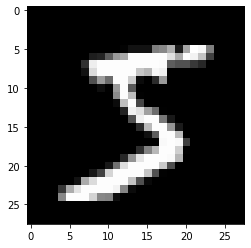

In [0]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

In [0]:
import math

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [0]:
def log_softmax(x):
  return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
  return log_softmax(xb @ weights + bias)

In [0]:
bs = 64 # batch size

xb = x_train[0:bs] # a mini batch from x
preds = model(xb) # predictions
preds[0], preds.shape
print(preds[0], preds.shape)

tensor([-2.2112, -2.7084, -2.5220, -2.3708, -2.3598, -1.8463, -2.6530, -2.1883,
        -2.1134, -2.3597], grad_fn=<SelectBackward>) torch.Size([64, 10])


In [0]:
def nll(input, target):
  return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [0]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(2.3629, grad_fn=<NegBackward>)


In [0]:
def accuracy(out, yb):
  preds = torch.argmax(out, dim=1)
  return(preds == yb).float().mean()

In [0]:
print(accuracy(preds, yb))

tensor(0.0312)


In [0]:
from IPython.core.debugger import set_trace

lr = 0.5 # learning rate
epochs = 2 # how many epochs to train for

for epoc in range(epochs):
  for i in range((n - 1) // bs + 1):
    # set_trace() # uncomment this to try out debugger
    start_i = i * bs
    end_i = start_i + bs
    xb = x_train[start_i:end_i]
    yb = y_train[start_i:end_i]
    pred = model(xb)
    loss = loss_func(pred, yb)

    loss.backward()
    with torch.no_grad():
      weights -= weights.grad * lr
      bias -= bias.grad * lr
      weights.grad.zero_()
      bias.grad.zero_()

In [0]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0809, grad_fn=<NegBackward>) tensor(1.)


In [0]:
import torch.nn.functional as F

loss_func = F.cross_entropy

def model(xb):
  return xb @ weights + bias

In [0]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0809, grad_fn=<NllLossBackward>) tensor(1.)


In [0]:
from torch import nn

class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(784, 10) / math.sqrt(784))
        self.bias = nn.Parameter(torch.zeros(10))

    def forward(self, xb):
        return xb @ self.weights + self.bias

In [0]:
model = Mnist_Logistic()

In [0]:
print(loss_func(model(xb), yb))


tensor(2.4052, grad_fn=<NllLossBackward>)


In [0]:
with torch.no_grad():
    for p in model.parameters(): p -= p.grad * lr
    model.zero_grad()

TypeError: ignored

In [0]:
def fit():
  for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
      start_i = i * bs
      end_i = start_i + bs
      xb = x_train[start_i: end_i]
      yb = y_train[start_i: end_i]
      pred = model(xb)
      loss = loss_func(pred, yb)

      loss.backward()
      with torch.no_grad():
        for p in model.parameters():
          p -= p.grad * lr
        model.zero_grad()
fit()

In [0]:
print(loss_func(model(xb), yb))

tensor(0.0816, grad_fn=<NllLossBackward>)


In [0]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, xb):
        return self.lin(xb)

In [0]:
model = Mnist_Logistic()
print(loss_func(model(xb), yb))

tensor(2.3486, grad_fn=<NllLossBackward>)


In [0]:
fit()
print(loss_func(model(xb), yb))

tensor(0.0808, grad_fn=<NllLossBackward>)


In [0]:
from torch import optim

In [0]:
def get_model():
  model = Mnist_Logistic()
  return model, optim.SGD(model.parameters(), lr=lr)

model, opt = get_model()
print(loss_func(model(xb), yb))

for epoch in range(epochs):
  for i in range((n - 1) // bs + 1):
    start_i = i * bs
    end_i = start_i + bs
    xb = x_train[start_i: end_i]
    yb = y_train[start_i: end_i]
    pred = model(xb)
    loss = loss_func(pred, yb)

    loss.backward()
    opt.step()
    opt.zero_grad()

print(loss_func(model(xb), yb))

tensor(2.2887, grad_fn=<NllLossBackward>)
tensor(0.0825, grad_fn=<NllLossBackward>)


In [0]:
from torch.utils.data import TensorDataset

In [0]:
model, opt = get_model()

for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        xb, yb = train_ds[i * bs: i * bs + bs]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

print(loss_func(model(xb), yb))

tensor(0.0818, grad_fn=<NllLossBackward>)


In [0]:
from torch.utils.data import DataLoader

train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs)

In [0]:
for xb, yb in train_dl:
  pred = model(xb)

In [0]:
model, opt = get_model()

for epoch in range(epochs):
  for xb, yb in train_dl:
    pred = model(xb)
    loss = loss_func(pred, yb)

    loss.backward()
    opt.step()
    opt.zero_grad()

print(loss_func(model(xb), yb))

tensor(0.0804, grad_fn=<NllLossBackward>)


In [0]:
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size=bs * 2)

In [0]:
model, opt = get_model()

for epoch in range(epochs):
    model.train()
    for xb, yb in train_dl:
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

    model.eval()
    with torch.no_grad():
        valid_loss = sum(loss_func(model(xb), yb) for xb, yb in valid_dl)

    print(epoch, valid_loss / len(valid_dl))

0 tensor(0.3042)
1 tensor(0.2817)


In [0]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

In [0]:
import numpy as np

def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)

        print(epoch, val_loss)

In [0]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

In [53]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
model, opt = get_model()
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

NameError: ignored

In [0]:
class Mnist_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)

    def forward(self, xb):
        xb = xb.view(-1, 1, 28, 28)
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb, 4)
        return xb.view(-1, xb.size(1))

lr = 0.1

In [0]:
model = Mnist_CNN()
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.3436611232995987
1 0.22426221685409545


In [0]:
class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)


def preprocess(x):
    return x.view(-1, 1, 28, 28)

In [0]:
model = nn.Sequential(
    Lambda(preprocess),
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AvgPool2d(4),
    Lambda(lambda x: x.view(x.size(0), -1)),
)

opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.35687828962802887
1 0.25747167279720307


In [0]:
def preprocess(x, y):
    return x.view(-1, 1, 28, 28), y


class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        batches = iter(self.dl)
        for b in batches:
            yield (self.func(*b))

train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

In [0]:
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)

opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [0]:
fit(epochs, model, loss_func, opt, train_dl, valid_dl)


0 0.3401533676624298
1 0.23293600144386292


In [0]:
print(torch.cuda.is_available())


True


In [0]:
dev = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")

In [0]:
def preprocess(x, y):
    return x.view(-1, 1, 28, 28).to(dev), y.to(dev)


train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

In [0]:
model.to(dev)
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [0]:
fit(epochs, model, loss_func, opt, train_dl, valid_dl)


0 0.1917406521320343
1 0.18984941139221193


<b>Our Attempt</b>

In [64]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [65]:
# hyper parameters
n_epochs = 4
bs_train = 64
bs_test = 1000
lr = 0.3
momentum = 0.5
log_interval = 5

random_seed = 42
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [66]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(root='./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=bs_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(root='./data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=bs_test, shuffle=True)

In [67]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.lin_layer = nn.Linear(320, 50, bias=False)

  def forward(self, x):
    x = F.relu(F.avg_pool2d(self.conv1(x), 2))
    x = F.relu(F.avg_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.lin_layer(x))
    x = F.dropout(x, training=self.training)
    return F.log_softmax(x)

MNIST_CNN = CNN()
MNIST_optimizer = optim.SGD(MNIST_CNN.parameters(), lr=lr, momentum=momentum)

In [68]:
def train(epoch):
  MNIST_CNN.train()
  for batch_index, (data, target) in enumerate(train_loader):
    MNIST_optimizer.zero_grad()
    output = MNIST_CNN(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    MNIST_optimizer.step()

In [69]:
def test():
  MNIST_CNN.eval()
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = MNIST_CNN(data)
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  print('Accuracy: {}%\n'.format(
    100. * correct / len(test_loader.dataset)))

In [70]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


Accuracy: 0.0%

Accuracy: 92.55000305175781%

Accuracy: 93.4000015258789%

Accuracy: 93.68000030517578%

Accuracy: 93.27999877929688%



**Our accuracy is around 93-94%.**

# **Problem** **6**

Note: run this part on GPU

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# hyper parameters
n_epochs = 4
bs_train = 64
bs_test = 1000
lr = 0.03
momentum = 0.5
log_interval = 10

random_seed = 42
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

device = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")

In [3]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.CIFAR10(root='./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                             ])),
  batch_size=bs_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.CIFAR10(root='./data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                             ])))

Files already downloaded and verified
Files already downloaded and verified


In [17]:
train_losses = []
test_losses = []

In [10]:
def train_CIFAR10(epoch, model, optimizer):
    model.train()
    loss_total = 0
    for batch_index, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_index % log_interval == 0:
          loss_total += loss.item()
    print(loss_total, len(train_loader.dataset), loss_total / len(train_loader.dataset))      
    train_losses.append(loss_total / len(train_loader.dataset))

In [11]:
def test_CIFAR10(model):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            prediction = output.argmax(dim=1, keepdim=True)
            correct += prediction.eq(target.data.view_as(prediction)).sum()
    test_loss /= len(test_loader.dataset)
    print("test loss:", test_loss)
    test_losses.append(test_loss)        
    print('Accuracy: {}%\n'.format(
    100. * correct / len(test_loader.dataset)))

<b>Testing different models on CIFAR10</b>

In [12]:
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3)
        self.conv2 = nn.Conv2d(64, 128, 3)
        self.conv3 = nn.Conv2d(128, 256, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

CNN1 = Model1()
Model1_optimizer = optim.SGD(CNN1.parameters(), lr=lr, momentum=momentum)
CNN1.to(device)

Model1(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [13]:
# test_CIFAR10(CNN1)
test_losses.clear()
for epoch in range(1, n_epochs + 1):
  train_CIFAR10(epoch, CNN1, Model1_optimizer)
  test_CIFAR10(CNN1)

157.24417734146118 50000 0.0031448835468292236


/opt/anaconda3/lib/python3.7/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


test loss: 1.7900823430292307
Accuracy: 36.06999969482422%



KeyboardInterrupt: 

<b>Accuracy is around 63% for model 1.</b>

In [ ]:
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.conv1 = nn.Conv2d(3, 12, 3, 1, 1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(12, 12, 3, 1, 1)
        self.relu2 = nn.ReLU()
        self.pool = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(12, 24,3, 1, 1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(24, 24, 3, 1, 1)
        self.relu4 = nn.ReLU()
        self.fc = nn.Linear(16 * 16 * 24, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        x = x.view(-1, 16 * 16 * 24)
        x = self.fc(x)
        return F.log_softmax(x)
        # return output

CNN2 = Model2()
Model2_optimizer = optim.SGD(CNN2.parameters(), lr=.001, momentum=.9) # Changed lr and momentum here for model 2
CNN2.to(device)

In [ ]:
# test_CIFAR10(CNN2)
for epoch in range(1, n_epochs + 1):
  train_CIFAR10(epoch, CNN2, Model2_optimizer)
  test_CIFAR10(CNN2)

<b>Accuracy is around 52% for model 2.</b>

In [ ]:
class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        return F.log_softmax(x)
    
CNN3 = Model3()
Model3_optimizer = optim.SGD(CNN3.parameters(), lr=lr, momentum=momentum) # Kept same parameters as model 1
CNN3.to(device)

In [ ]:
# test_CIFAR10(CNN3)
for epoch in range(1, n_epochs + 1):
  train_CIFAR10(epoch, CNN3, Model3_optimizer)
  test_CIFAR10(CNN3)

<b>Accuracy is around 53% for model 3.</b>

<b>The depth of the models does not seem to have a great effect on the result. The models have a varying number of layers, but the accuracy is relatively close. It matters more what the layers are doing, rather than how many.</b>

Testing effect of momentum with learning rate of .1

In [ ]:
momentum_array = [0.1, 0.3, 0.7, .9]

# these will hold each array for each trial so we can plot later without having to rerun model
momentum_train_losses1 = []
momentum_test_losses1 = []

momentum_train_losses2 = []
momentum_test_losses2 = []

momentum_train_losses3 = []
momentum_test_losses3 = []

momentum_train_losses4 = []
momentum_test_losses4 = []

model1 = Model1()
model1.to(device)
train_losses.clear()
test_losses.clear()
model1_optimizer = optim.SGD(model1.parameters(), lr=.1, momentum = 0.1)
for epoch in range(1, n_epochs + 1):
  train_CIFAR10(epoch, model1, model1_optimizer)
  test_CIFAR10(model1)
momentum_train_losses1 = train_losses
momentum_test_losses1 = test_losses

model2 = Model1()
model2.to(device)
train_losses.clear()
test_losses.clear()
model2_optimizer = optim.SGD(model2.parameters(), lr=.1, momentum = 0.3)
for epoch in range(1, n_epochs + 1):
  train_CIFAR10(epoch, model2, model2_optimizer)
  test_CIFAR10(model2)
momentum_train_losses2 = train_losses
momentum_test_losses2 = test_losses


model3 = Model1()
model3.to(device)
train_losses.clear()
test_losses.clear()
model3_optimizer = optim.SGD(model3.parameters(), lr=.1, momentum = 0.7)
for epoch in range(1, n_epochs + 1):
  train_CIFAR10(epoch, model3, model3_optimizer)
  test_CIFAR10(model3)
momentum_train_losses3 = train_losses
momentum_test_losses3 = test_losses


model4 = Model1()
model4.to(device)
train_losses.clear()
test_losses.clear()
model4_optimizer = optim.SGD(model4.parameters(), lr=.1, momentum = 0.9)
for epoch in range(1, n_epochs + 1):
  train_CIFAR10(epoch, model4, model4_optimizer)
  test_CIFAR10(model4)
momentum_train_losses4 = train_losses
momentum_test_losses4 = test_losses


# NOTE: for some reason these all get overwrriten by last set of losses (maybe memory issue with GPU)
print(momentum_train_losses1)
print(momentum_test_losses1)

print(momentum_train_losses2)
print(momentum_test_losses2)

print(momentum_train_losses3)
print(momentum_test_losses3)

print(momentum_train_losses4)
print(momentum_test_losses4)

learning rate = .01

In [ ]:
momentum_array = [0.1, 0.3, 0.7, .9]

# these will hold each array for each trial so we can plot later without having to rerun model
momentum_train_losses1 = []
momentum_test_losses1 = []

momentum_train_losses2 = []
momentum_test_losses2 = []

momentum_train_losses3 = []
momentum_test_losses3 = []

momentum_train_losses4 = []
momentum_test_losses4 = []

model1 = Model1()
model1.to(device)
train_losses.clear()
test_losses.clear()
model1_optimizer = optim.SGD(model1.parameters(), lr=.01, momentum = 0.1)
for epoch in range(1, n_epochs + 1):
  train_CIFAR10(epoch, model1, model1_optimizer)
  test_CIFAR10(model1)
momentum_train_losses1 = train_losses
momentum_test_losses1 = test_losses

model2 = Model1()
model2.to(device)
train_losses.clear()
test_losses.clear()
model2_optimizer = optim.SGD(model2.parameters(), lr=.01, momentum = 0.3)
for epoch in range(1, n_epochs + 1):
  train_CIFAR10(epoch, model2, model2_optimizer)
  test_CIFAR10(model2)
momentum_train_losses2 = train_losses
momentum_test_losses2 = test_losses


model3 = Model1()
model3.to(device)
train_losses.clear()
test_losses.clear()
model3_optimizer = optim.SGD(model3.parameters(), lr=.01, momentum = 0.7)
for epoch in range(1, n_epochs + 1):
  train_CIFAR10(epoch, model3, model3_optimizer)
  test_CIFAR10(model3)
momentum_train_losses3 = train_losses
momentum_test_losses3 = test_losses


model4 = Model1()
model4.to(device)
train_losses.clear()
test_losses.clear()
model4_optimizer = optim.SGD(model4.parameters(), lr=.01, momentum = 0.9)
for epoch in range(1, n_epochs + 1):
  train_CIFAR10(epoch, model4, model4_optimizer)
  test_CIFAR10(model4)
momentum_train_losses4 = train_losses
momentum_test_losses4 = test_losses

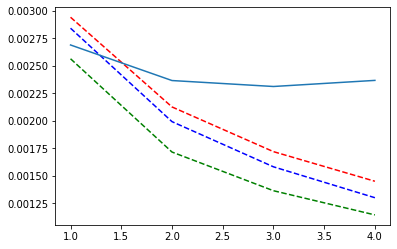

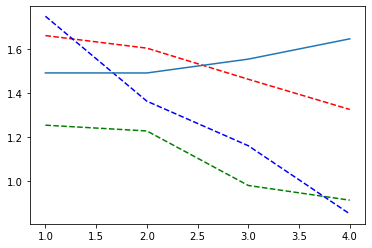

In [16]:
# Plots for learning rate = 0.1
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
# NOTE: have to copy the losses over after each calculation because list is being overwritten for some reason
momentum_train_losses1 = [0.0029403739094734193,0.0021254292941093444,0.001719337958097458, 0.0014503430569171906]
momentum_train_losses2 = [0.0028407124972343444, 0.0019919761276245116, 0.0015815676379203796, 0.0013008242398500442]
momentum_train_losses3 = [0.0025631234550476073,
0.0017157915306091308,
0.0013644081687927247,
0.0011445720857381821]
momentum_train_losses4 = [0.0026884434604644777,
0.0023653291058540345,
0.0023112612557411195,
0.0023667406845092774]

momentum_test_losses1 = [1.6625812524676322,
1.6051895192146302,
1.4630702455163003,
1.3252057385206222]
momentum_test_losses2 = [1.750878131377697,
1.362992237663269,
1.1594786290407182,
0.848188038122654]
momentum_test_losses3 = [1.2534145884156227,
1.2270465430498123,
0.9780042097449303,
0.9109865257620812]
momentum_test_losses4 = [1.492093264257908,
1.4918513139605523,
1.555112489926815,
1.6477410009384155]


fig = plt.figure()
plt.plot(x, momentum_train_losses1, 'r--', x, momentum_train_losses2, 'b--', x, momentum_train_losses3, 'g--', x, momentum_train_losses4)

fig2 = plt.figure()
plt.plot(x, momentum_test_losses1, 'r--', x, momentum_test_losses2, 'b--', x, momentum_test_losses3, 'g--', x, momentum_test_losses4)

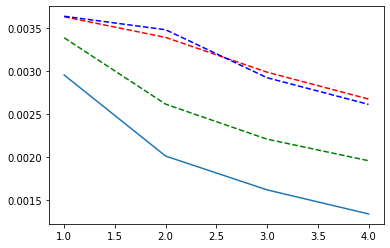

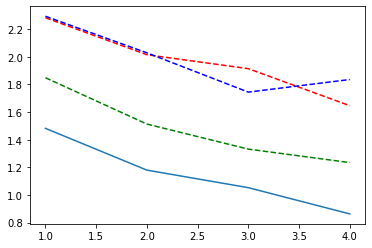

In [15]:
# Plots for learning rate = 0.01
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
# NOTE: have to copy the losses over after each calculation because list is being overwritten for some reason
momentum_train_losses1 = [0.003628567600250244,
0.003388888680934906,
0.002986208918094635,
0.002674887363910675]
momentum_train_losses2 = [0.0036344224119186403,
0.0034779961729049682,
0.002921876382827759,
0.0026128575682640076]
momentum_train_losses3 = [0.003384963550567627,
0.002615483522415161,
0.0022098110580444337,
0.001960178356170654]
momentum_train_losses4 = [0.0029532729959487916,
0.0020138071501255034,
0.0016221970522403717,
0.0013435211312770843]

momentum_test_losses1 = [2.2815722467422486,
2.0143521444559096,
1.9135107523322106,
1.6456671124696731]
momentum_test_losses2 = [2.2925906298160554,
2.028073802471161,
1.7438815403461456,
1.8349284271359443]
momentum_test_losses3 = [1.8480881862998009,
1.512797189950943,
1.331684125316143,
1.2342850183963776]
momentum_test_losses4 = [1.4819285321116447,
1.1797573986291885,
1.0529551633119583,
0.8630687967777252]

# Training Loss
fig = plt.figure()
plt.plot(x, momentum_train_losses1, 'r--', x, momentum_train_losses2, 'b--', x, momentum_train_losses3, 'g--', x, momentum_train_losses4)

# Testing Loss
fig2 = plt.figure()
plt.plot(x, momentum_test_losses1, 'r--', x, momentum_test_losses2, 'b--', x, momentum_test_losses3, 'g--', x, momentum_test_losses4)

<b>From the graphs it is clear that learning rate and momentum have an affect on the losses. With a learning rate of .1, the losses were relatively lower than with a learning rate of .01. In both cases, as momentum increased, for the most part losses decreased. </b>

<b>The best combination of parameters for our model is a learning rate of 0.1 and momentum of 0.3 over 4 epochs. With this combination we got 71% accuracy. If you look at the first set of graphs, the second plot shows this combination having the lowest testing loss as the epochs progress.</b>